In this notebook, I explore the concept of reprojecting raster data using a subset of a large raster file

In [15]:
import xarray
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
import hvplot.xarray #interactive plotting
import pandas as pd

In [52]:
raster= rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/lowman/MCS2/MCS_20_27Jan2021_snow_diff.tif')

raster

<xarray.DataArray (band: 1, y: 11115, x: 14801)>
[164513115 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -116.4 -116.4 -116.4 ... -115.0 -115.0 -115.0
  * y            (y) float64 44.48 44.48 44.48 44.48 ... 43.59 43.59 43.59 43.59
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [55]:
#slice the array to a 10 by 10 pixel around the 
raster_slice = raster.sel(x=slice(-115.6663800, -115.6652270), y=slice(43.9323088, 43.9317179))
raster_slice

<xarray.DataArray (band: 1, y: 7, x: 12)>
array([[[      nan,       nan,       nan,       nan,       nan, -1.488416,
          1.28643 , -0.947504, -2.910537, -1.041654,  3.895568,  1.977549],
        [ 6.168153,       nan,       nan,       nan,       nan, -0.590009,
          1.62715 ,  0.535318, -2.422367, -1.905285,  2.95221 ,  3.445627],
        [11.299048,       nan,  7.08725 ,       nan,       nan,       nan,
         -0.649818, -2.622975,  0.435852,  1.514266,  3.354714,  4.24755 ],
        [ 5.738336,  6.890195,  1.487263, -1.082855,       nan,       nan,
               nan,  1.540356,  4.607305,  4.571764,  4.417939,  2.911647],
        [ 4.224995,  6.051439,  1.539925,       nan,       nan,       nan,
         -0.525453,  5.901088,  4.76825 ,  3.835738, -0.222939, -0.261748],
        [      nan, -0.675455, -1.720825, -2.682142, -5.011647, -4.578999,
          4.126043,  3.858072,  2.597656, -2.537207, -1.760908, -3.167843],
        [ 0.211603, -2.896444, -1.308195,  3.267601,  3.876759,  3.843324,
          2.442029,  1.94962 ,  1.223597,  1.384096,  1.330489,  0.878979]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -115.7 -115.7 -115.7 ... -115.7 -115.7 -115.7
  * y            (y) float64 43.93 43.93 43.93 43.93 43.93 43.93 43.93
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

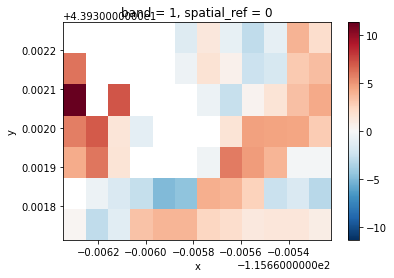

In [56]:
raster_slice.plot()

In [59]:
print(raster_slice.mean())
print(raster_slice.sum())

<xarray.DataArray ()>
array(1.5045558, dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(96.29157, dtype=float32)
Coordinates:
    spatial_ref  int64 0


In [57]:
# #save raster as a tiff file
# raster_slice.rio.to_raster("sliced-20-27-Jan.tif")

## Slicing Arrays

In [16]:
da = xarray.DataArray(
    np.random.rand(4,3),
    [('time', pd.date_range('2000-01-01', periods=4)),
    ('space', ['IA', 'IL', 'IN'])]
)

In [17]:
da.values

array([[0.67919636, 0.29679316, 0.75563037],
       [0.09903164, 0.31323769, 0.06628226],
       [0.29423854, 0.17808536, 0.61096559],
       [0.36566958, 0.91867321, 0.86461891]])

### Positional Dimensional Lookup
Can be by integer or by label.

In [18]:
#positional dimensional lookup by integer indexing
da[:2]

<xarray.DataArray (time: 2, space: 3)>
array([[0.67919636, 0.29679316, 0.75563037],
       [0.09903164, 0.31323769, 0.06628226]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
  * space    (space) <U2 'IA' 'IL' 'IN'

In [19]:
#positional dimensional lookup by integer indexing
da[0, 0]

<xarray.DataArray ()>
array(0.67919636)
Coordinates:
    time     datetime64[ns] 2000-01-01
    space    <U2 'IA'

In [20]:
#positional dimensional lookup label
da.loc["2000-01-01":"2000-01-02", "IA"]

<xarray.DataArray (time: 2)>
array([0.67919636, 0.09903164])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
    space    <U2 'IA'

### Name Dimensional Lookup
With the dimension names, we do not have to rely on dimension order and can use them explicitly to slice data. There are two ways to do this:
1. integer indexing
2. Label indexing


In [25]:
#name dimensional lookup by integer indexing
da.isel(time= slice(0,2))

<xarray.DataArray (time: 2, space: 3)>
array([[0.67919636, 0.29679316, 0.75563037],
       [0.09903164, 0.31323769, 0.06628226]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
  * space    (space) <U2 'IA' 'IL' 'IN'

In [27]:
#name dimensional lookup by integer indexing
da.isel(time= slice(0,2), space = 0)

<xarray.DataArray (time: 2)>
array([0.67919636, 0.09903164])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
    space    <U2 'IA'

In [28]:
#name dimensional lookup by label indexing
da.sel(time= slice("2000-01-01", "2000-01-02"), space = "IA")

<xarray.DataArray (time: 2)>
array([0.67919636, 0.09903164])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
    space    <U2 'IA'